In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text 

### Dados

In [258]:
# Importar dados
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSr7tU5tK8cvvR32yypE1PArgXhmNbFJ9bw8w6Sm2zQhyaMs27csoo-77vgFedHw9z25Ez3Qm-geKyU/pub?gid=43084471&single=true&output=csv', skiprows= 1)

df.drop(columns='Unnamed: 0', inplace= True)
df.reset_index(drop = True)
df

,Parameter,MTOW (kg),MTOW (lb),Empty_Weight (kg),Empty_Weight (lb),Payload_Weight (kg),Payload_Weight (lb),Number_of_passengers,Baggage_compartment_volume (m³),Baggage_compartment_volume (ft³),...,Engine name,Number_of_engines,Engine_location,Total_maximum_thrust (lbf),Engine_TSFC,Wing_loading,Thrust-to-weight_ratio,Landing_gear_configuration,Number_of_wheels_of_the_NLG,Number_of_wheels_of_the_MLG
0,E175,"37,500.00","82,673.00","21,810.00","48,083.00","10,200.00","22,487.00",84,17.12,604.59,...,CF34- 8E5,2,Underwing,"28,400.00",0.68,515.68,5.60,Tricycle,2,4
1,A220,"61,235.00","134,000.00","33,300.00","73,400.00","27,935.00","60,600.00",120,20.75,280.00,...,QTY: 2 Pure Power™ PW1519G,2,Underwing,"37,372.00",0.51,545.28,5.08,Tricycle,2,4
2,CRJ900,"37,421.00","82,500.00","22,131.00","48,790.00","9,907.00","21,840.00",90,24.54,866.27,...,CF34- 8C,2,Rear-mounted twin,"29,000.00",0.68,526.54,6.00,Tricycle,2,4
3,RJ70,"43,091.00","95,000.00","23,900.00","52,690.00","7,790.00","17,174.00",100,13.56,479.00,...,Textron Lycoming LF 507,4,Underwing,"28,219.17",0.41,557.45,5.09,Tricycle,2,4
4,ARJ21-700,"43,500.00","95,902.00","24,955.00","55,017.00","8,935.00","19,698.00",90,20.15,711.40,...,General Electric CF34-10A,2,Overwing,"35,280.00",0.65,544.70,5.10,Tricycle,2,4
5,ATR 72-600,"22,800.00","50,265.00","13,450.00","29,652.00","7,550.00","16,645.00",72,15.52,553.50,...,PW127M/N,2,Underwing,NaN,NaN,373.77,NaN,Tricycle,2,4
6,Fokker 100,"45,810.00","100,990.00","24,511.00","54,104.00","11,993.00","26,440.00",100,17.08,603.17,...,Rolls-Royce Tay 650,2,Overwing,"30,200.00",0.69,489.95,4.20,Tricycle,2,4
7,B717-200,"49,895.00","110,000.00","30,617.00","67,500.00","12,020.00","26,500.00",106,26.50,935.00,...,Rolls Royce BR715,2,Overwing,"37,000.00",0.62,536.51,4.68,Tricycle,2,4
8,B737-200,"52,390.00","115,500.00","27,125.00","59,900.00","15,966.00","35,200.00",130,24.80,875.00,...,JTD8,2,Underwing,"32,000.00",0.57,513.63,3.61,Tricycle,2,4
9,Tupolev Tu-134A,"47,000.00","103,600.00","29,050.00","64,045.00","8,200.00","18,100.00",84,14.50,512.06,...,Soloviev D30 Série II,2,Overwing,"29,980.00",0.78,369.21,4.45,Tricycle,2,4


In [259]:
df.columns.to_list()

['Parameter',
 'MTOW (kg)',
 'MTOW (lb)',
 'Empty_Weight (kg)',
 'Empty_Weight (lb)',
 'Payload_Weight (kg)',
 'Payload_Weight (lb)',
 'Number_of_passengers',
 'Baggage_compartment_volume (m³)',
 'Baggage_compartment_volume (ft³)',
 'Range (NM)',
 'Cruise_Mach',
 'Cruise_altitude (m)',
 'Cruise_altitude (ft)',
 'Service_ceiling(ft)',
 'Takeoff_distance(m)',
 'Landing_distance(m)',
 'Wing_area (m²)',
 'Wing_area (ft²)',
 'Wing_aspect_ratio',
 'Wing_taper_ratio',
 'Wing_sweep(deg)',
 'Wing_dihedral (deg)',
 'Wing_location_(high,low,...)',
 'HT_area (m2)',
 'HT_aspect_ratio',
 'HT_taper_ratio',
 'HT_sweep (deg)',
 'HT_dihedral (deg)',
 'HT_lever_arm (ft)',
 'c_ref (ft)',
 'CHT',
 'VT_area (ft2)',
 'VT_area (m2)',
 'VT_aspect_ratio',
 'VT_taper_ratio',
 'VT_sweep',
 'VT_lever_arm(ft)',
 'CVT',
 'Tail_configuration',
 'Fuselage_length (m)',
 'Cockpit_length(m)',
 'Main_section_length(m)',
 'Tail_cone_length(m)',
 'Fuselage_diameter (m)',
 'Number_of_doors',
 'Number_of_window_exits',
 'Engi

In [260]:
#df = df[(df["Parameter"] == "E175") | (df["Parameter"] == "RJ70") | (df["Parameter"] == "Fokker 100") | (df["Parameter"] == "B717-200") | (df["Parameter"] == "ARJ21-700") | (df["Parameter"] == "Tupolev Tu-134A") | (df["Parameter"] == "A220") | (df["Parameter"] == "CRJ900")]

### Matriz de correlação


Pares de colunas com correlação > 0.8:
Wing_taper_ratio e Cruise_Mach: -0.82
Wing_sweep(deg) e Cruise_Mach: 0.83
HT_sweep (deg) e Wing_sweep(deg): 0.96
VT_area (m2) e HT_area (m2): 0.87
Main_section_length(m) e Fuselage_length (m): 0.88
Thrust-to-weight_ratio e HT_taper_ratio: 0.87


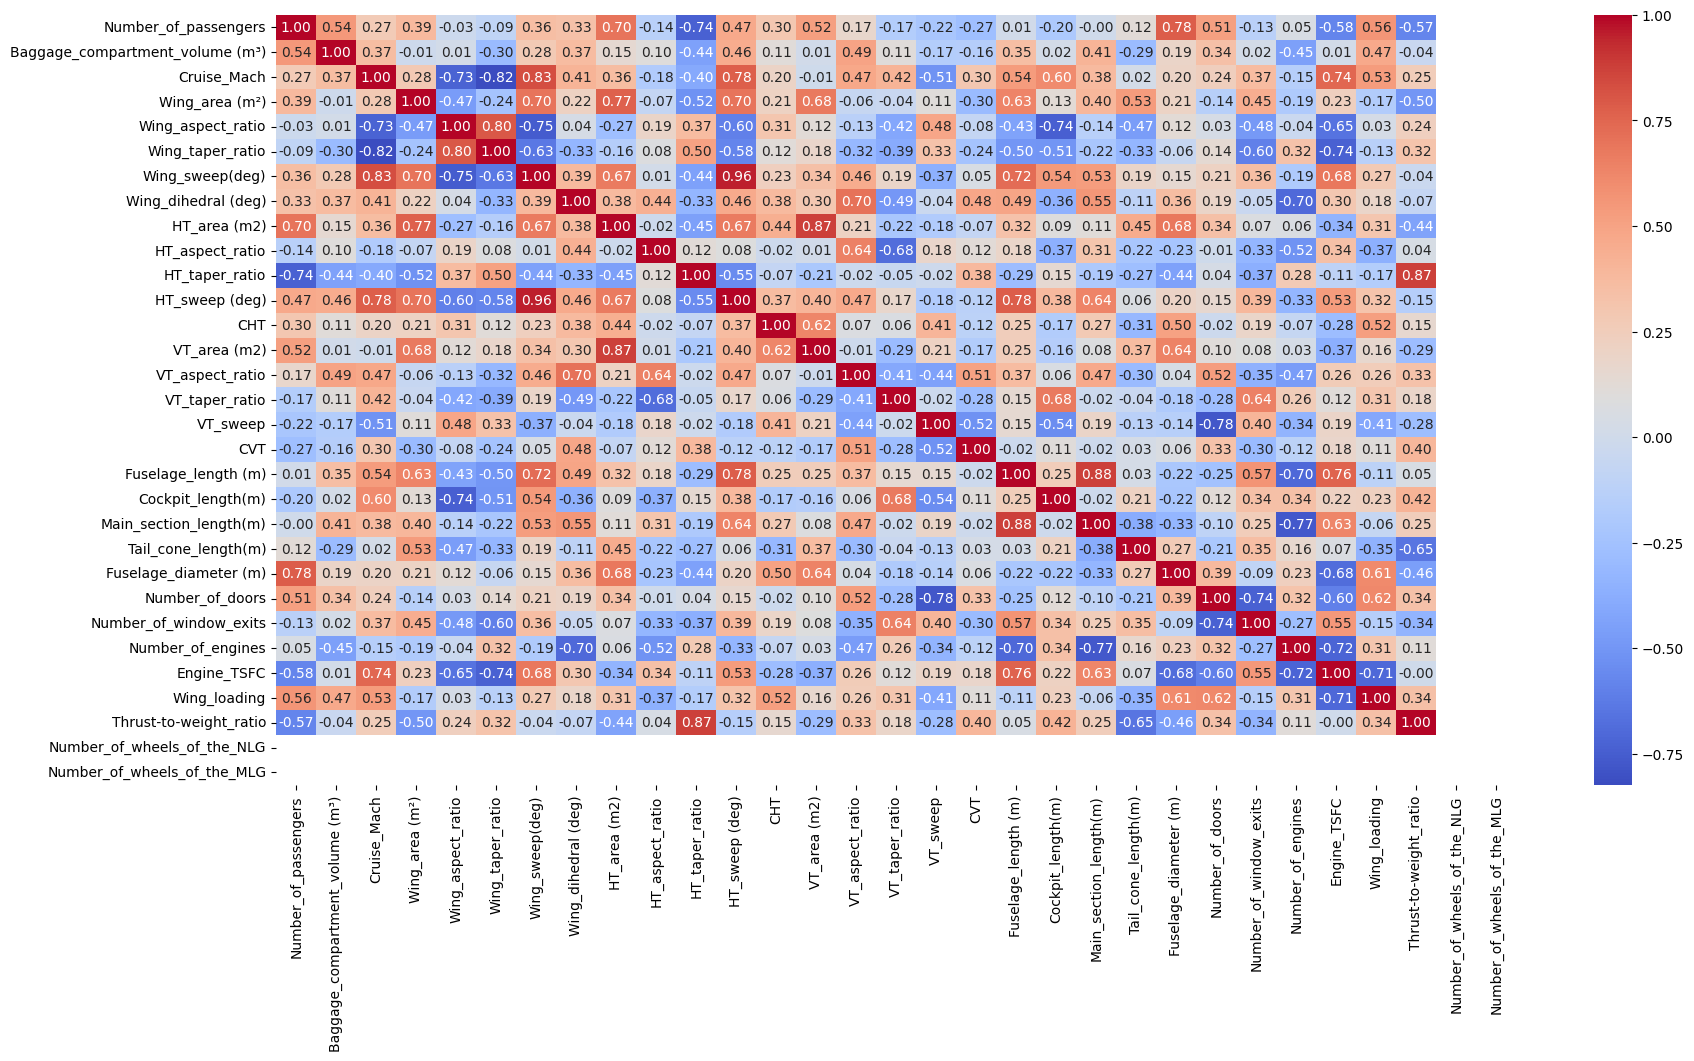

In [261]:
# Calculando a matriz de correlação
cols = df.columns
string_columns = df.select_dtypes(include=['object']).columns
ft_columns = [col for col in cols if 'ft' in col]
lb_columns = [col for col in cols if 'lb' in col]

colunas_para_remover = list(set(string_columns) | set(ft_columns) | set(lb_columns))
colunas_para_remover = [col for col in colunas_para_remover if col in df.columns]

correlation_matrix = df.drop(columns=colunas_para_remover).corr()

plt.figure(figsize=(20, 10))

# Criando um heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Exibindo o gráfico
#plt.show()

# Filtrando pares de colunas com correlação superior a 0.8
# Criando um DataFrame booleano para detectar correlações superiores a 0.8

correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix[col1][col2]) > 0.8:
            high_corr_pairs.append((col1, col2, correlation_matrix[col1][col2]))

# Exibindo os pares de colunas com correlação > 0.8
print("\nPares de colunas com correlação > 0.8:")
for pair in high_corr_pairs:
    print(f"{pair[0]} e {pair[1]}: {pair[2]:.2f}")



Pares de colunas com correlação > 0.8:

- MTOW (kg) e Number_of_passengers: 0.95
- MTOW (kg) e Wing_area (m²): 0.97
Empty_Weight (kg) e Range (NM): -0.84
Number_of_passengers e Wing_area (m²): 0.92
Range (NM) e Fuselage_diameter (m): -0.83
Cruise_Mach e Wing_taper_ratio: -0.81
Cruise_Mach e Engine_TSFC: 0.93
Wing_taper_ratio e Engine_TSFC: -0.82
Wing_sweep(deg) e Fuselage_length (m): 0.89
Wing_sweep(deg) e Engine_TSFC: 0.83
Wing_dihedral (deg) e Engine_TSFC: 0.85
Fuselage_length (m) e Engine_TSFC: 0.89


### Função para fazer os plots

In [262]:
def plotar(coluna1, coluna2):
    # Pré-processamento dos dados
    df[coluna1] = df[coluna1].astype(str).str.replace(',', '').str.strip()
    df[coluna2] = df[coluna2].astype(str).str.replace(',', '').str.strip()

    df[coluna1] = pd.to_numeric(df[coluna1], errors='coerce')
    df[coluna2] = pd.to_numeric(df[coluna2], errors='coerce')

    # Removendo NaN antes do cálculo
    df.dropna(subset=[coluna1, coluna2], inplace=True)

    X = df[coluna1].values
    Y = df[coluna2].values

    # Primeira regressão (com todos os dados)
    Z1 = np.polyfit(X, Y, 1)
    p1 = np.poly1d(Z1)
    Y_pred1 = p1(X)  # Valores preditos

    # Calcular erro (resíduos) e desvio padrão
    erros = Y - Y_pred1
    desvio_padrao = np.std(erros)

    # Definir limites de outliers (2 desvios padrão)
    limite_inferior = Y_pred1 - 1.5 * desvio_padrao
    limite_superior = Y_pred1 + 1.5 * desvio_padrao

    # Identificar e remover outliers
    mascara = (Y >= limite_inferior) & (Y <= limite_superior)
    X_filtrado, Y_filtrado = X[mascara], Y[mascara]
    X_outliers, Y_outliers = X[~mascara], Y[~mascara]

    print(f"X_filtrado: {X_filtrado}")
    print(f"Y_filtrado: {Y_filtrado}")
    print(f"X_outliers: {X_outliers}")
    print(f"Y_outliers: {Y_outliers}")

    # Segunda regressão (apenas com os dados filtrados)
    Z2 = np.polyfit(X_filtrado, Y_filtrado, 1)
    p2 = np.poly1d(Z2)
    Y_pred2 = p2(X_filtrado)  # Valores preditos após remoção de outliers 

   

    # Criar figura
    plt.figure(figsize=(12, 8))

    # Plot dos dados históricos filtrados
    plt.scatter(X_filtrado, Y_filtrado, label='Dados Filtrados', color='black')

    # Plot dos outliers em azul
    plt.scatter(X_outliers, Y_outliers, label='Outliers', color='blue')

    sns.lineplot(x=np.sort(X), y=p2(np.sort(X)), color='gray', linestyle='dotted', 
                 label=f'Regressão Linear: f(x) = {p2[0].round(3)} + {p2[1].round(6)} x')


    delta_x = (X_filtrado.max() - X_filtrado.min()) / 50
    delta_y = (Y_filtrado.max() - Y_filtrado.min()) / 20

    # DataFrame auxiliar para legendas
    df_aviao = df[['Parameter', coluna1, coluna2]].copy()
    df_aviao['Y_pred'] = p2(df_aviao[coluna1])
    df_aviao.set_index('Parameter', inplace=True)

    posicoes_rotulos = []

    for index, aviao in df_aviao.iterrows():
        x = aviao[coluna1]
        y = aviao[coluna2]
        y_pred = aviao['Y_pred']
        label_x = x - delta_x
        label_y = y + delta_y * 0.5 if y > y_pred else y - delta_y

        # Verifica se há um rótulo muito próximo e ajusta a posição
        for px, py in posicoes_rotulos:
            if abs(label_x - px) < delta_x * 1.5 and abs(label_y - py) < delta_y * 1.5:
                label_y += delta_y  # Move um pouco para cima

        posicoes_rotulos.append((label_x, label_y))

        plt.text(label_x, label_y, str(index), fontsize=10)

    # Configuração dos eixos e legenda
    plt.xlabel(coluna1, fontsize=16)
    plt.ylabel(coluna2, fontsize=16)
    plt.legend(fontsize=14)

    ax = plt.gca()
    ax.tick_params(axis='x', top=False)
    ax.tick_params(axis='y', right=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.6)
    ax.spines['left'].set_linewidth(0.6)
    ax.tick_params(axis='x', bottom=True, direction='in', length=4, width=0.6)
    ax.tick_params(axis='y', left=True, direction='in', length=4, width=0.6)

    plt.grid(False)
    plt.show()

X_filtrado: [37500. 61235. 37421. 43091. 43500. 22800. 45810.]
Y_filtrado: [21810. 33300. 22131. 23900. 24955. 13450. 24511.]
X_outliers: [49895. 52390. 47000.]
Y_outliers: [30617. 27125. 29050.]


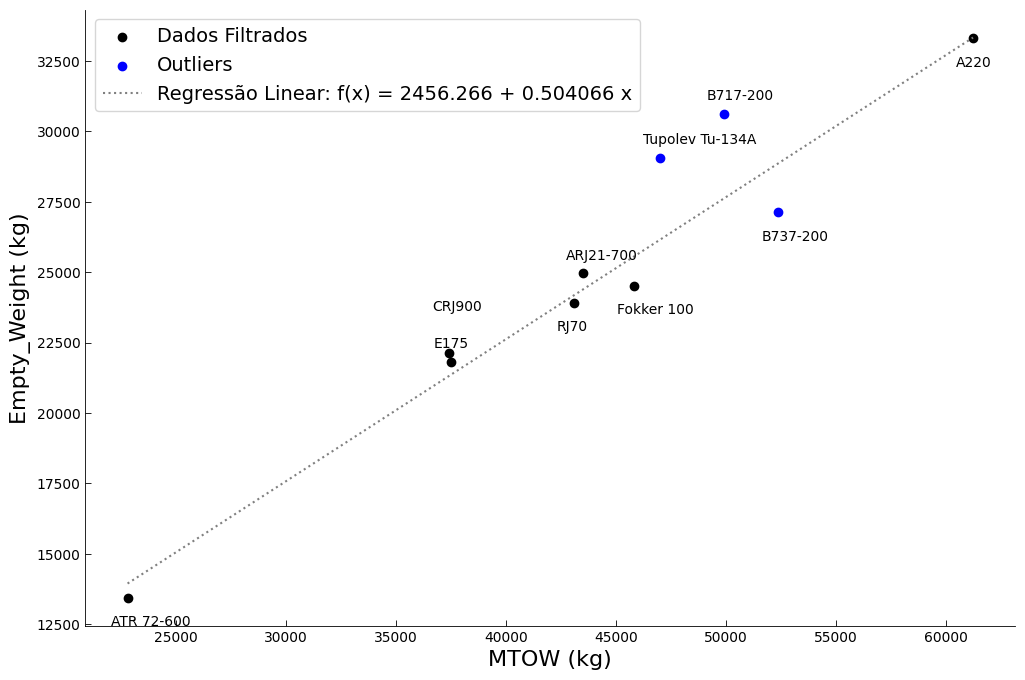

In [263]:
# Peso Vazio x MTOW
plotar("MTOW (kg)", "Empty_Weight (kg)")

In [ ]:
# Número de passageiros x MTOW
plotar("Number_of_passengers", "MTOW (kg)")

In [ ]:
# Número de passageiros x Comprimento de fuselagem
plotar("Number_of_passengers", "Fuselage_length (m)")

In [ ]:
plotar('Number_of_passengers','Fuselage_diameter (m)')

In [ ]:
# Mach de cruzeiro x Enflechamento da asa

plotar("Cruise_Mach", "Wing_sweep(deg)")

X_filtrado: [37500. 61235. 37421. 43091. 43500. 22800. 45810.]
Y_filtrado: [21810. 33300. 22131. 23900. 24955. 13450. 24511.]
X_outliers: [49895. 52390. 47000.]
Y_outliers: [30617. 27125. 29050.]
                 MTOW (kg)  Empty_Weight (kg)        Y_pred
Parameter                                                  
E175               37500.0            21810.0  21358.738508
A220               61235.0            33300.0  33322.743274
CRJ900             37421.0            22131.0  21318.917300
RJ70               43091.0            23900.0  24176.971103
ARJ21-700          43500.0            24955.0  24383.134067
ATR 72-600         22800.0            13450.0  13948.969389
Fokker 100         45810.0            24511.0  25547.526358
B717-200           49895.0            30617.0  27606.635667
B737-200           52390.0            27125.0  28864.280154
Tupolev Tu-134A    47000.0            29050.0  26147.364810
E175
36731.3
A220
CRJ900
RJ70
ARJ21-700
ATR 72-600
Fokker 100
B717-200
B737-200
Tupo

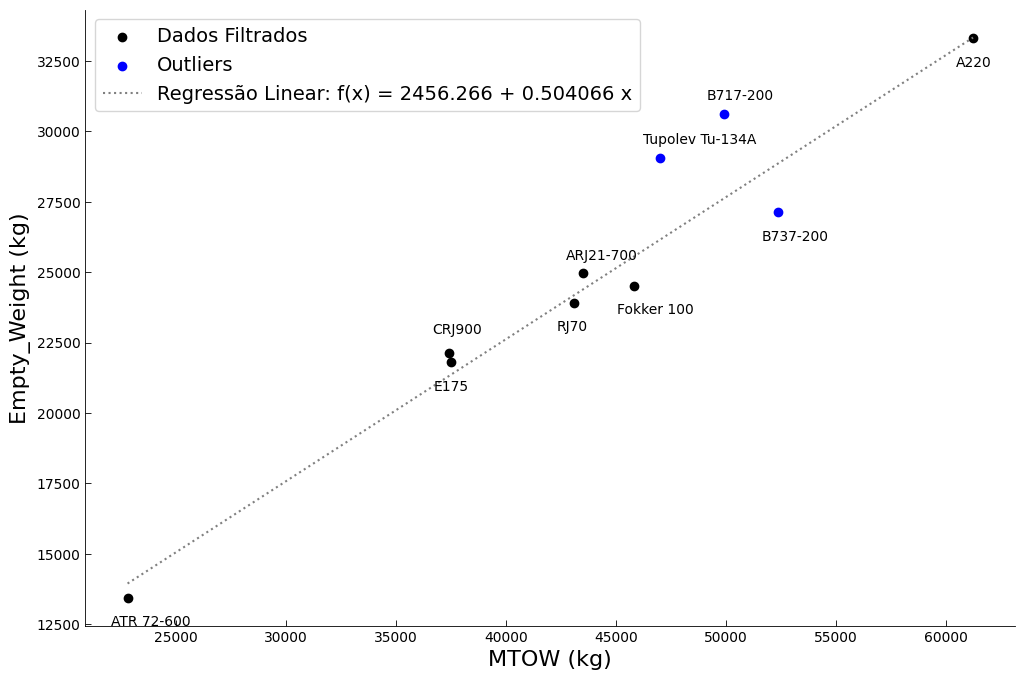

In [268]:
# MTOW x Área da asa

def plotar2(coluna1, coluna2):
    # Pré-processamento dos dados
    df[coluna1] = df[coluna1].astype(str).str.replace(',', '').str.strip()
    df[coluna2] = df[coluna2].astype(str).str.replace(',', '').str.strip()

    df[coluna1] = pd.to_numeric(df[coluna1], errors='coerce')
    df[coluna2] = pd.to_numeric(df[coluna2], errors='coerce')

    # Removendo NaN antes do cálculo
    df.dropna(subset=[coluna1, coluna2], inplace=True)

    X = df[coluna1].values
    Y = df[coluna2].values

    # Primeira regressão (com todos os dados)
    Z1 = np.polyfit(X, Y, 1)
    p1 = np.poly1d(Z1)
    Y_pred1 = p1(X)  # Valores preditos

    # Calcular erro (resíduos) e desvio padrão
    erros = Y - Y_pred1
    desvio_padrao = np.std(erros)

    # Definir limites de outliers (2 desvios padrão)
    limite_inferior = Y_pred1 - 1.5 * desvio_padrao
    limite_superior = Y_pred1 + 1.5 * desvio_padrao

    # Identificar e remover outliers
    mascara = (Y >= limite_inferior) & (Y <= limite_superior)
    X_filtrado, Y_filtrado = X[mascara], Y[mascara]
    X_outliers, Y_outliers = X[~mascara], Y[~mascara]

    print(f"X_filtrado: {X_filtrado}")
    print(f"Y_filtrado: {Y_filtrado}")
    print(f"X_outliers: {X_outliers}")
    print(f"Y_outliers: {Y_outliers}")

    # Segunda regressão (apenas com os dados filtrados)
    Z2 = np.polyfit(X_filtrado, Y_filtrado, 1)
    p2 = np.poly1d(Z2)
    Y_pred2 = p2(X_filtrado)  # Valores preditos após remoção de outliers 

   

    # Criar figura
    plt.figure(figsize=(12, 8))

    # Plot dos dados históricos filtrados
    plt.scatter(X_filtrado, Y_filtrado, label='Dados Filtrados', color='black')

    # Plot dos outliers em azul
    plt.scatter(X_outliers, Y_outliers, label='Outliers', color='blue')

    sns.lineplot(x=np.sort(X), y=p2(np.sort(X)), color='gray', linestyle='dotted', 
                 label=f'Regressão Linear: f(x) = {p2[0].round(3)} + {p2[1].round(6)} x')


    delta_x = (X_filtrado.max() - X_filtrado.min()) / 50
    delta_y = (Y_filtrado.max() - Y_filtrado.min()) / 20

    # DataFrame auxiliar para legendas
    df_aviao = df[['Parameter', coluna1, coluna2]].copy()
    df_aviao['Y_pred'] = p2(df_aviao[coluna1])
    df_aviao.set_index('Parameter', inplace=True)

    posicoes_rotulos = []
    print(df_aviao)
    for index, aviao in df_aviao.iterrows():
        x = aviao[coluna1]
        y = aviao[coluna2]
        y_pred = aviao['Y_pred']
        label_x = x - delta_x
        label_y = y + delta_y * 0.5 if y > y_pred else y - delta_y

        # Verifica se há um rótulo muito próximo e ajusta a posição
        for px, py in posicoes_rotulos:
            if abs(label_x - px) < delta_x * 1.5 and abs(label_y - py) < delta_y * 1.5:
                label_y += delta_y * 1.2

        posicoes_rotulos.append((label_x, label_y))
        print(index)
        if index == 'E175':
            print(label_x)
            plt.text(label_x, label_y - 1500, str(index), fontsize=10)
        elif index == 'CRJ900':
            plt.text(label_x, label_y - 1000, str(index), fontsize=10)
        else:    
            plt.text(label_x, label_y, str(index), fontsize=10)

    # Configuração dos eixos e legenda
    plt.xlabel(coluna1, fontsize=16)
    plt.ylabel(coluna2, fontsize=16)
    plt.legend(fontsize=14)

    ax = plt.gca()
    ax.tick_params(axis='x', top=False)
    ax.tick_params(axis='y', right=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.6)
    ax.spines['left'].set_linewidth(0.6)
    ax.tick_params(axis='x', bottom=True, direction='in', length=4, width=0.6)
    ax.tick_params(axis='y', left=True, direction='in', length=4, width=0.6)

    plt.grid(False)
    plt.show()


plotar2("MTOW (kg)", "Empty_Weight (kg)")

In [271]:
df[['Parameter', "Empty_Weight (kg)", "MTOW (kg)"]]

,Parameter,Empty_Weight (kg),MTOW (kg)
0,E175,21810.0,37500.0
1,A220,33300.0,61235.0
2,CRJ900,22131.0,37421.0
3,RJ70,23900.0,43091.0
4,ARJ21-700,24955.0,43500.0
5,ATR 72-600,13450.0,22800.0
6,Fokker 100,24511.0,45810.0
7,B717-200,30617.0,49895.0
8,B737-200,27125.0,52390.0
9,Tupolev Tu-134A,29050.0,47000.0


In [ ]:
# MTOW x Range
plotar("MTOW (kg)", "Range (NM)")

X_filtrado: [37500. 61235. 37421. 43091. 45810. 52390. 47000.]
Y_filtrado: [28400.   37372.   29000.   28219.17 30200.   32000.   29980.  ]
X_outliers: [43500. 49895.]
Y_outliers: [35280. 37000.]


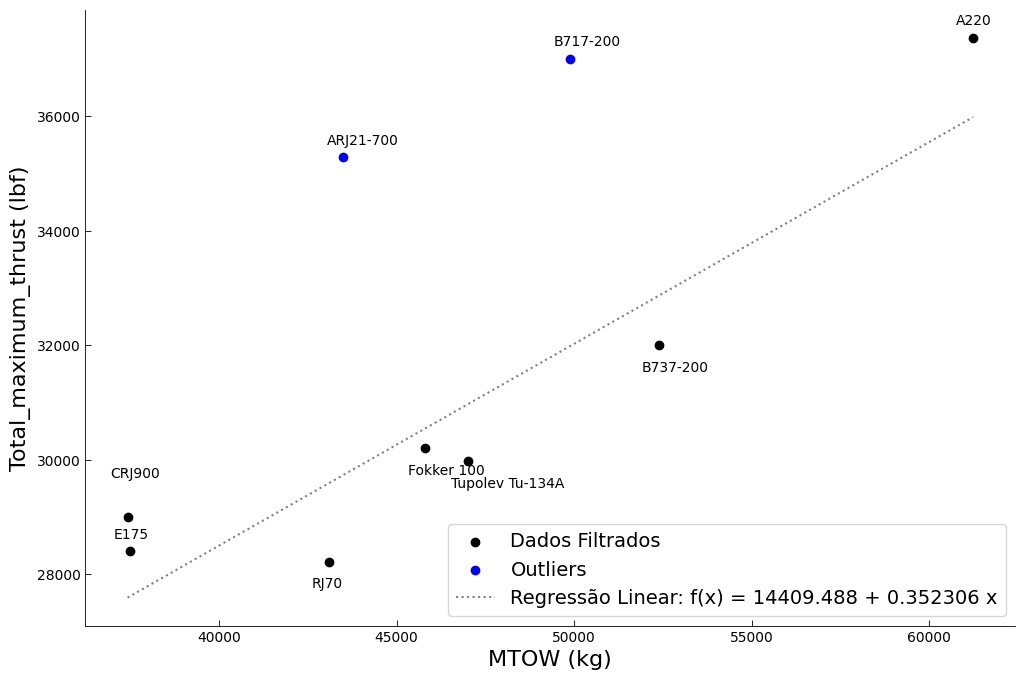

In [256]:
# MTOW x TSFC
plotar("MTOW (kg)", "Total_maximum_thrust (lbf)")


In [ ]:
plotar('Fuselage_diameter (m)', 'Engine_TSFC')

X_filtrado: [0.51 0.68 0.41 0.65 0.69 0.62 0.57]
Y_filtrado: [0.68 0.78 0.67 0.78 0.77 0.77 0.73]
X_outliers: [0.68 0.78]
Y_outliers: [0.82 0.74]


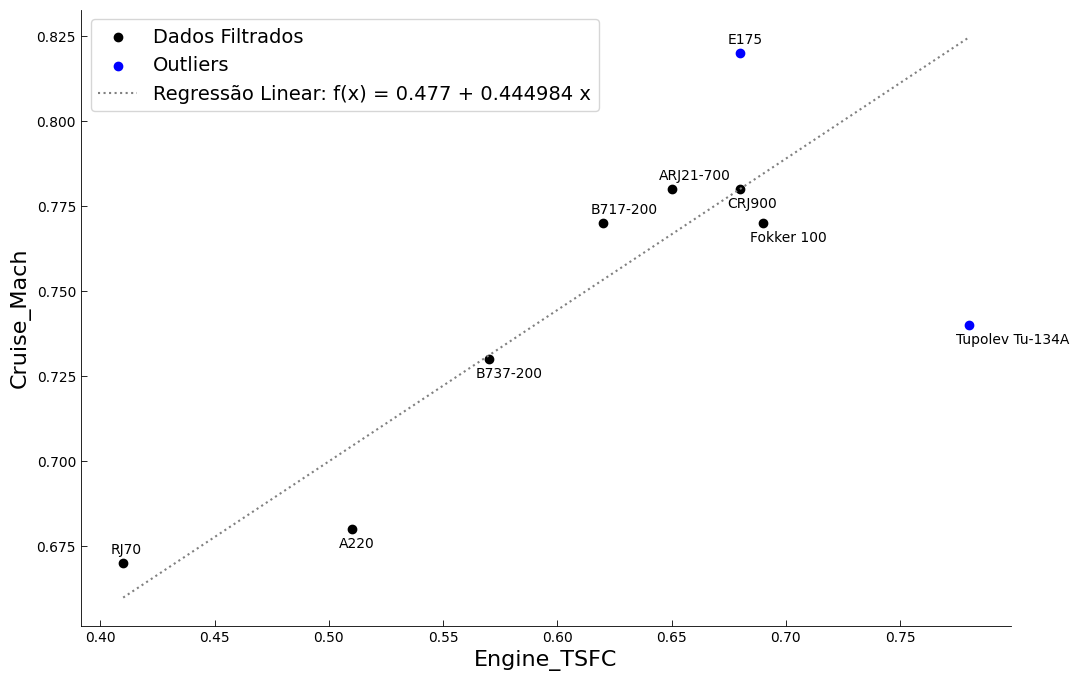

In [252]:
plotar('Engine_TSFC', 'Cruise_Mach')